In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import NullFormatter
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.patches as patches
from scipy.interpolate import UnivariateSpline
from scipy import stats
from astropy import stats as astrostats
import astropy.visualization as vis
from sklearn.mixture import GMM
from astroML.plotting.tools import draw_ellipse

plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
plt.rc('text', usetex='true')
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18
rcParams['font.size'] = 18

In [2]:
df = pd.read_csv('M71.csv',header=0,index_col=False)

df_nodubs = df.groupby('ID_kud').median()

df_nodubs_nobad = df_nodubs[(df_nodubs.Hel_RV >= -61) & (df_nodubs.Hel_RV <= 17)]

#df_nodubs_nobad_all = df_nodubs[(df_nodubs.Hel_RV >= -61) & (df_nodubs.Hel_RV <= 17)]

#df_rgb_all = df_nodubs_nobad_all[df_nodubs_nobad_all.Branch == 0]

#df_nodubs_nobad = df_nodubs_nobad[df_nodubs_nobad.Mv <= 3]
df_rgb = df[df.Branch == 0]
df_agb = df[df.Branch == 1]
df_hb = df[df.Branch == 2]
df_mstars = df[df.Branch == 3]

df_rgb_nobad = df_rgb[(df_rgb.Hel_RV >= -61) & (df_rgb.Hel_RV <= 17)]
df_agb_nobad = df_agb[(df_agb.Hel_RV >= -61) & (df_agb.Hel_RV <= 17)]
df_hb_nobad = df_hb[(df_hb.Hel_RV >= -61) & (df_hb.Hel_RV <= 17)]

df_rgb_nodub = df_rgb_nobad.groupby('ID_kud').mean()
df_agb_nodub = df_agb_nobad.groupby('ID_kud').mean()
df_hb_nodub = df_hb_nobad.groupby('ID_kud').mean()

df_rgb_nodub_reindex = df_rgb_nodub.reset_index()
df_agb_nodub_reindex = df_agb_nodub.reset_index()
df_hb_nodub_reindex = df_hb_nodub.reset_index()

df_na_measure = df_nodubs_nobad[df_nodubs_nobad.nafe < 99]
df_o_measure = df_nodubs_nobad[df_nodubs_nobad.ofe < 99]

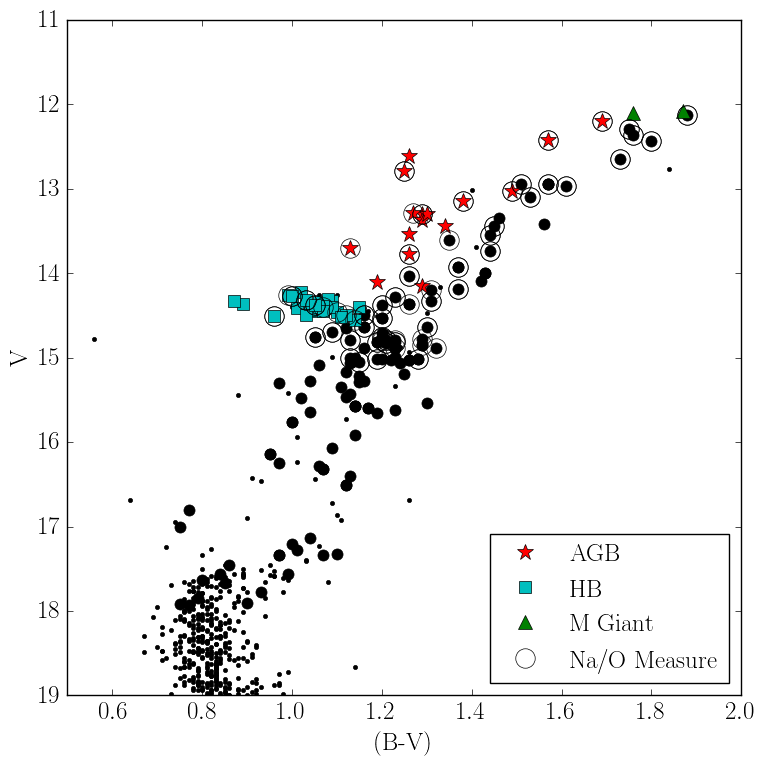

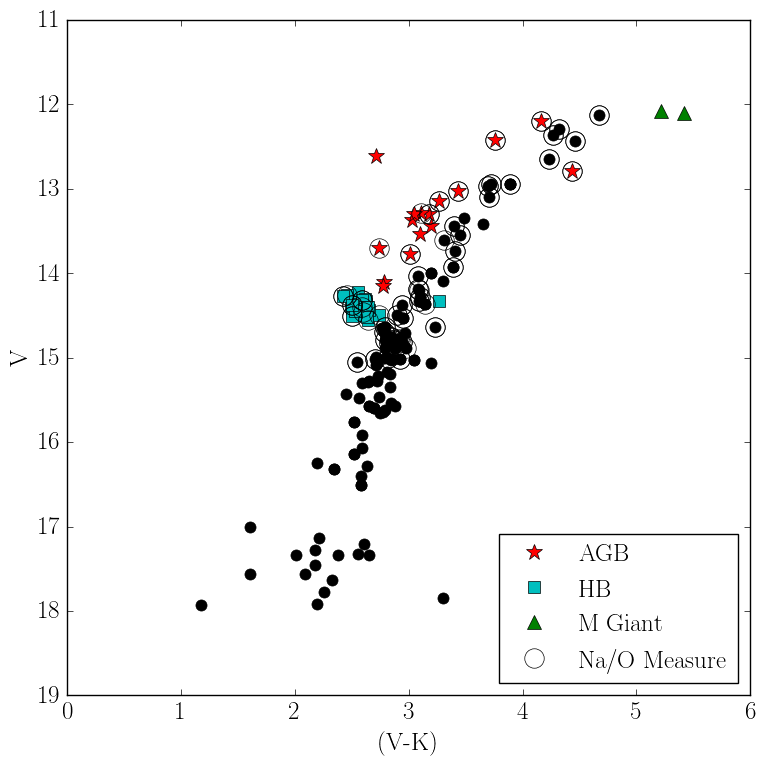

In [5]:
Vphot, BVphot, prob = np.loadtxt('m71_allwpm_namefiller.txt', skiprows=1, usecols=(6,7,8), unpack=True)

Vphot = Vphot[np.where(prob >= 85)]
BVphot = BVphot[np.where(prob >= 85)]

fig = plt.figure(figsize=(8,8))
plt.xlim(0.5,2.0)
plt.ylim(19,11)
plt.ylabel('V')
plt.xlabel('(B-V)')
plt.plot(BVphot, Vphot, 'k.')
#plt.plot(np.array(df_nodubs.BV_kud), np.array(df_nodubs.V_kud), 'rx', markersize=6, label='Non-Member')
plt.plot(np.array(df_rgb.BV_kud), np.array(df_rgb.V_kud), 'ko', markersize=8)
plt.plot(np.array(df_agb.BV_kud), np.array(df_agb.V_kud), 'r*', markersize=12, label='AGB')
plt.plot(np.array(df_hb.BV_kud), np.array(df_hb.V_kud), 'cs', markersize=8, label='HB')
plt.plot(np.array(df_mstars.BV_kud), np.array(df_mstars.V_kud), 'g^', markersize=10, label='M Giant')
plt.plot(np.array(df_na_measure.BV_kud), np.array(df_na_measure.V_kud), 'ko', markerfacecolor='none', markersize=14, label='Na/O Measure')
plt.plot(np.array(df_o_measure.BV_kud), np.array(df_o_measure.V_kud), 'ko', markerfacecolor='none', markersize=14)#, label='Na/O Measure')
plt.legend(numpoints=1, loc=4)
plt.tight_layout()
plt.savefig('cmd-sample.pdf')
plt.show()
plt.close()

Vphot, BVphot, prob = np.loadtxt('m71_allwpm_namefiller.txt', skiprows=1, usecols=(6,7,8), unpack=True)

Vphot = Vphot[np.where(prob >= 85)]
BVphot = BVphot[np.where(prob >= 85)]

fig = plt.figure(figsize=(8,8))
plt.xlim(0.0,6.0)
plt.ylim(19,11)
plt.ylabel('V')
plt.xlabel('(V-K)')
#plt.plot(np.array(df_nodubs.BV_kud), np.array(df_nodubs.V_kud), 'rx', markersize=6, label='Non-Member')
plt.plot(np.array(df_rgb.V_kud - df_rgb.K), np.array(df_rgb.V_kud), 'ko', markersize=8)
plt.plot(np.array(df_agb.V_kud - df_agb.K), np.array(df_agb.V_kud), 'r*', markersize=12, label='AGB')
plt.plot(np.array(df_hb.V_kud - df_hb.K), np.array(df_hb.V_kud), 'cs', markersize=8, label='HB')
plt.plot(np.array(df_mstars.V_kud - df_mstars.K), np.array(df_mstars.V_kud), 'g^', markersize=10, label='M Giant')
plt.plot(np.array(df_na_measure.V_kud - df_na_measure.K), np.array(df_na_measure.V_kud), 'ko', markerfacecolor='none', markersize=14, label='Na/O Measure')
plt.plot(np.array(df_o_measure.V_kud - df_o_measure.K), np.array(df_o_measure.V_kud), 'ko', markerfacecolor='none', markersize=14)#, label='Na/O Measure')
plt.legend(numpoints=1, loc=4)
plt.tight_layout()
plt.savefig('cmd-sample-vk.pdf')
plt.show()
plt.close()

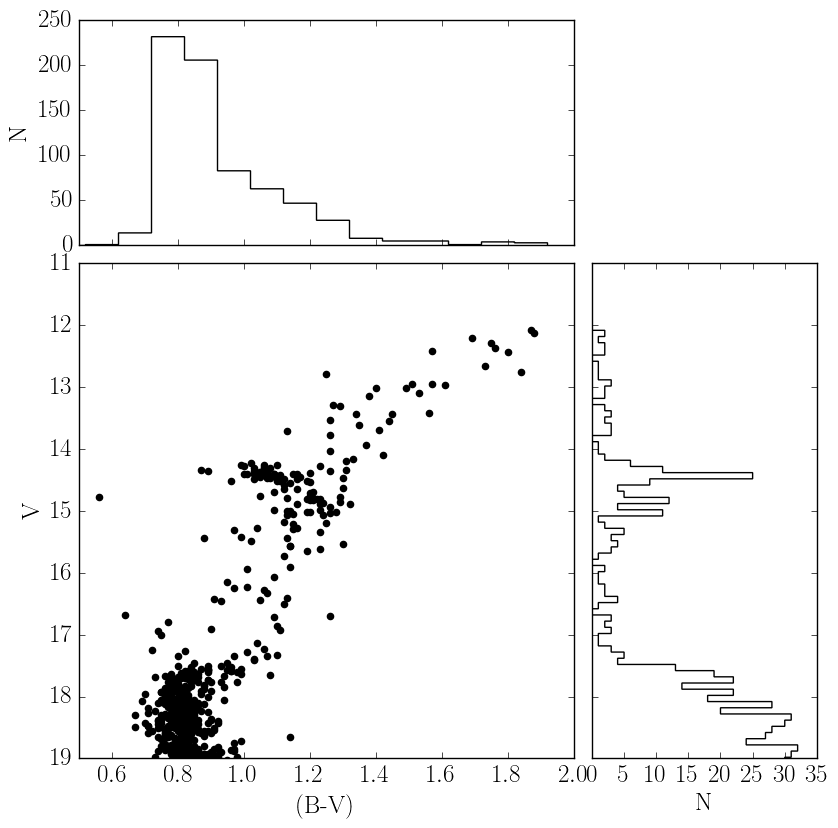

In [13]:
left, width = 0.12, 0.55
bottom, height = 0.12, 0.55
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

fig = plt.figure(1, figsize = (9,9))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.set_ylim(19,11)
axScatter.set_xlim(0.5,2.0)
axScatter.set_xlabel('(B-V)')
axScatter.set_ylabel('V')
axScatter.scatter(BVphot, Vphot, color='black')

axHisty.set_ylim(19,11)
axHistx.set_xlim(0.5,2.0)
axHistx.hist(BVphot, bins=np.arange(min(BVphot), max(BVphot) + 0.1, 0.1), histtype='step', color='black')
axHistx.set_ylabel('N')
axHisty.hist(Vphot, bins =np.arange(min(Vphot), max(Vphot) + 0.1, 0.1), histtype='step', orientation='horizontal', color='black')
axHisty.set_xlabel('N')
plt.savefig("cmd-histograms.pdf")
plt.show()
plt.close()